In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [9]:
#load dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\myexcel - myexcel.csv.csv")  
print(df) 

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1      Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2     John Holland  Boston Celtics      30       SG   27  06-May     205   
3      R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  06-Mar     203   
454      Raul Neto       Utah Jazz      25       PG   24  06-Jan     179   
455   Tibor Pleiss       Utah Jazz      21        C   26  07-Mar     256   
456    Jeff Withey       Utah Jazz      24        C   26     7-0     231   
457       Priyanka       Utah Jazz      34        C   25  07-Mar     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

# Preprocessing

In [23]:
# checking for null values
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [27]:
# treating the null value of college and salary
df['Salary'].fillna(df['Salary'].mean(),inplace = True)
df['College'].fillna(df['College'].mode()[0],inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11964\4214490364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(),inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11964\4214490364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [29]:
df.isnull().sum() #null values are treated

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [31]:
df.describe()

,Number,Age,Height,Weight,Salary
count,458.000000,458.000000,458.000000,458.000000,4.580000e+02
mean,17.713974,26.934498,165.010917,221.543668,4.833970e+06
std,15.966837,4.400128,8.908844,26.343200,5.163335e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,158.000000,200.000000,1.100150e+06
50%,13.000000,26.000000,165.000000,220.000000,2.862190e+06
75%,25.000000,30.000000,172.000000,240.000000,6.323553e+06
max,99.000000,40.000000,180.000000,307.000000,2.500000e+07


# Replacing with Random funcion

In [12]:
df['Height'] = np.random.randint(150, 181, size=len(df))
print(df['Height'].head())

0    180
1    169
2    166
3    152
4    154
Name: Height, dtype: int32


# Analysis tasks

In [15]:
# Calculate percentage split
team_counts = df['Team'].value_counts()
team_percentages = (team_counts / len(df)) * 100
team_distribution = pd.DataFrame({
    'Employee Count': team_counts,
    'Percentage (%)': team_percentages.round(2)
})
print(team_distribution)


                        Employee Count  Percentage (%)
Team                                                  
New Orleans Pelicans                19            4.15
Memphis Grizzlies                   18            3.93
Utah Jazz                           16            3.49
New York Knicks                     16            3.49
Milwaukee Bucks                     16            3.49
Brooklyn Nets                       15            3.28
Portland Trail Blazers              15            3.28
Oklahoma City Thunder               15            3.28
Denver Nuggets                      15            3.28
Washington Wizards                  15            3.28
Miami Heat                          15            3.28
Charlotte Hornets                   15            3.28
Atlanta Hawks                       15            3.28
San Antonio Spurs                   15            3.28
Houston Rockets                     15            3.28
Boston Celtics                      15            3.28
Indiana Pa

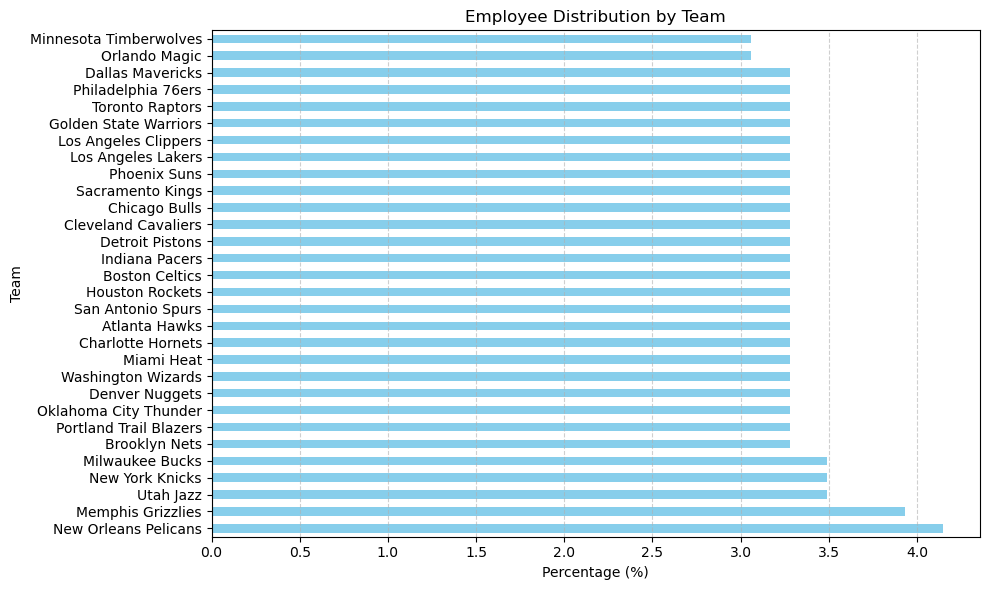

In [69]:
# Visulaize

team_distribution['Percentage (%)'].plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Employee Distribution by Team')
plt.xlabel('Percentage (%)')
plt.ylabel('Team')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# segregate employees based on their positions 

In [20]:
# Group and count employees by Position
position_counts = df['Position'].value_counts()
print(position_counts)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


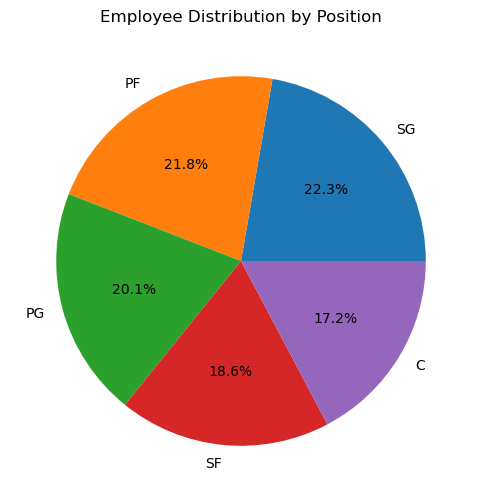

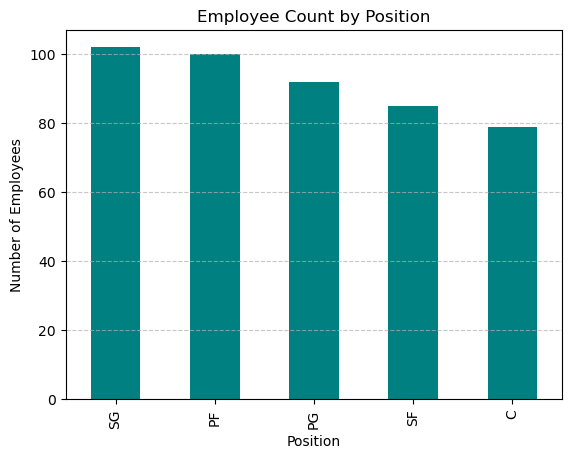

In [34]:
# Visualize using Pie chart
position_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Employee Distribution by Position')
plt.ylabel('')  # Hide y-label
plt.show()

# Or bar chart
position_counts.plot(kind='bar', color='teal', title='Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Predominant age group among employees

In [40]:
bins = [15, 20, 25, 30, 35, 40, 45, 50]
labels = ['16–20', '21–25', '26–30', '31–35', '36–40', '41–45', '46–50']

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Count number of employees in each group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Display result
print(age_group_counts)

# Identify predominant age group
predominant_age_group = age_group_counts.idxmax()
print("\n Predominant Age Group:", predominant_age_group)


Age_Group
16–20     21
21–25    179
26–30    167
31–35     68
36–40     23
41–45      0
46–50      0
Name: count, dtype: int64

 Predominant Age Group: 21–25


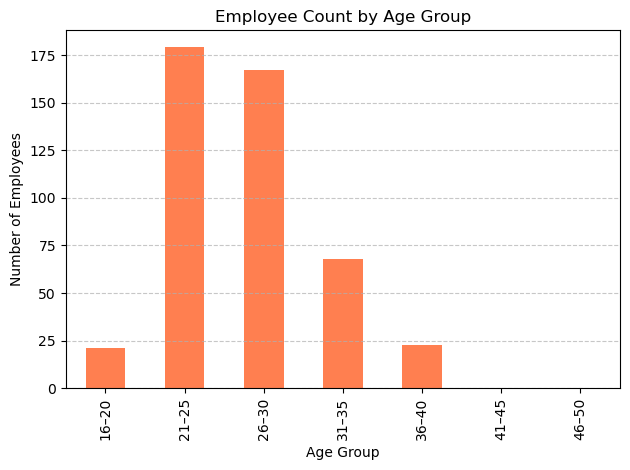

In [71]:
#Visualize
import matplotlib.pyplot as plt

age_group_counts.plot(kind='bar', color='coral', title='Employee Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# team and position having highest expenditure

In [42]:
# Group by Team and Position, and sum the Salary
salary_by_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

# Find the row with the highest salary expenditure
max_salary_row = salary_by_team_position.loc[salary_by_team_position['Salary'].idxmax()]

# Display result
print(" Team and Position with the Highest Salary Expenditure:")
print(f"Team: {max_salary_row['Team']}")
print(f"Position: {max_salary_row['Position']}")
print(f"Total Salary: {max_salary_row['Salary']}")


 Team and Position with the Highest Salary Expenditure:
Team: Los Angeles Lakers
Position: SF
Total Salary: 31866445.0


In [64]:
# Sort descending to see top spenders
salary_by_team_position_sorted = salary_by_team_position.sort_values(by='Salary', ascending=False)
print(salary_by_team_position_sorted.head())


                   Team Position      Salary                    Label
67   Los Angeles Lakers       SF  31866445.0  Los Angeles Lakers - SF
75           Miami Heat       PF  31538671.0          Miami Heat - PF
53      Houston Rockets       SG  28122883.0     Houston Rockets - SG
116        Phoenix Suns       PG  28002998.0        Phoenix Suns - PG
37       Denver Nuggets       SF  27982771.0      Denver Nuggets - SF


# Visualize for top 10

C:\Users\HP\AppData\Local\Temp\ipykernel_11964\949965998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Salary', y=top10['Team'] + " - " + top10['Position'], palette='viridis')


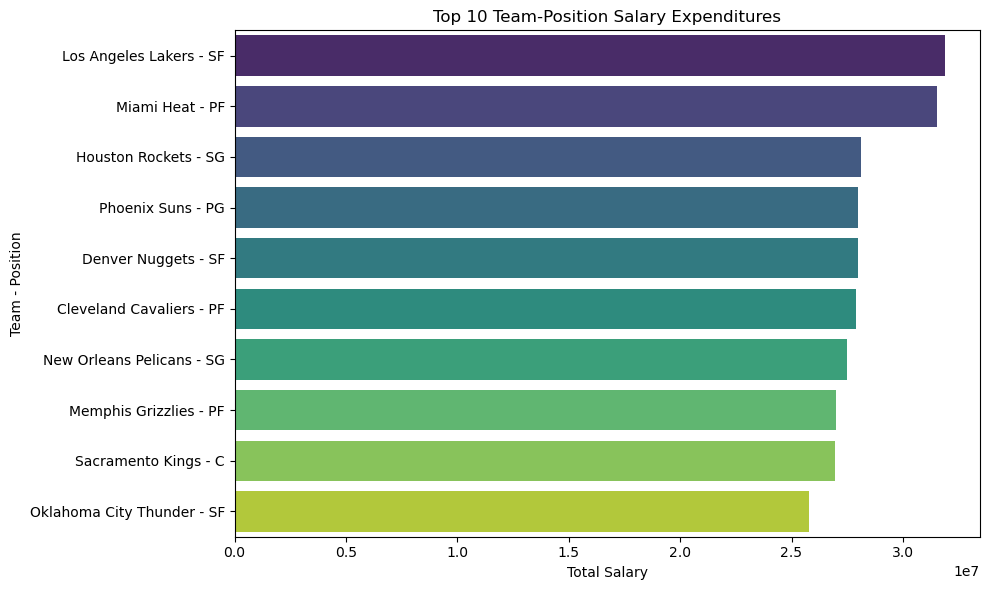

In [67]:
top10 = salary_by_team_position_sorted.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='Salary', y=top10['Team'] + " - " + top10['Position'], palette='viridis')
plt.title('Top 10 Team-Position Salary Expenditures')
plt.xlabel('Total Salary')
plt.ylabel('Team - Position')
plt.tight_layout()
plt.show()


# Correlation between salary and age

In [58]:
# Drop rows with missing values in Age or Salary
df_clean = df.dropna(subset=['Age', 'Salary'])
df_clean.head(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
0,Avery Bradley,Boston Celtics,0,PG,25,180,180,Texas,7.730337e+06,21–25
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6.796117e+06,21–25
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,4.833970e+06,26–30


In [60]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')


# Calculate correlation
correlation = df_clean['Age'].corr(df_clean['Salary'])
print(f"📊 Correlation between Age and Salary: {round(correlation, 3)}")

📊 Correlation between Age and Salary: 0.211


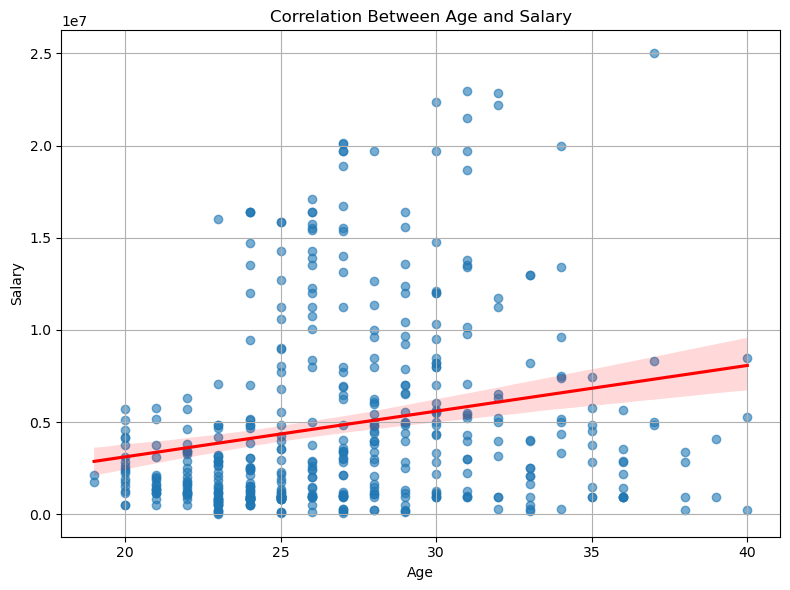

In [62]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=df_clean, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

# Insights and Findings